#Project :- IRIS FLOWER CLASSIFICATION

1)The Iris flower dataset consists of three species: setosa, versicolor,
and virginica. These species can be distinguished based on their
measurements. Now, imagine that you have the measurements
of Iris flowers categorized by their respective species. Your
objective is to train a machine learning model that can learn from
these measurements and accurately classify the Iris flowers into
their respective species.

2)Use the Iris dataset to develop a model that can classify iris
flowers into different species based on their sepal and petal
measurements. This dataset is widely used for introductory
classification tasks.

In [ ]:
#Import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Read dataset and Analyzing
df = pd.read_csv('IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
#Getting the shape
df.shape

(150, 5)

In [ ]:
#Getting the Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
#Getting the Null values
df.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


In [ ]:
#Getting Duplicate values
df.duplicated().sum()

3

In [ ]:
#Getting the EDA
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Making a copy to original file for any data lost precaution

In [ ]:
df1 = df.copy()

#Starting Data cleaning Process

In [ ]:
#Handling duplicate values
df1 = df1.drop_duplicates()
df1.info()


<class 'pandas.core.frame.DataFrame'>
Index: 147 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  147 non-null    float64
 1   sepal_width   147 non-null    float64
 2   petal_length  147 non-null    float64
 3   petal_width   147 non-null    float64
 4   species       147 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.9+ KB


In [ ]:
#Checking duplicated
df1.duplicated().sum()

0

##New EDA on cleaned data

In [ ]:
df1.reset_index(drop=True, inplace=True)
df1.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df1.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
#Import stats and perform Z-Score
import scipy.stats as stats
df1 = df1[(np.abs(stats.zscore(df1[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']], nan_policy='omit')) < 3).all(axis=1)]
df1.shape

(146, 5)

#Checking univariate and Multivariate distribution

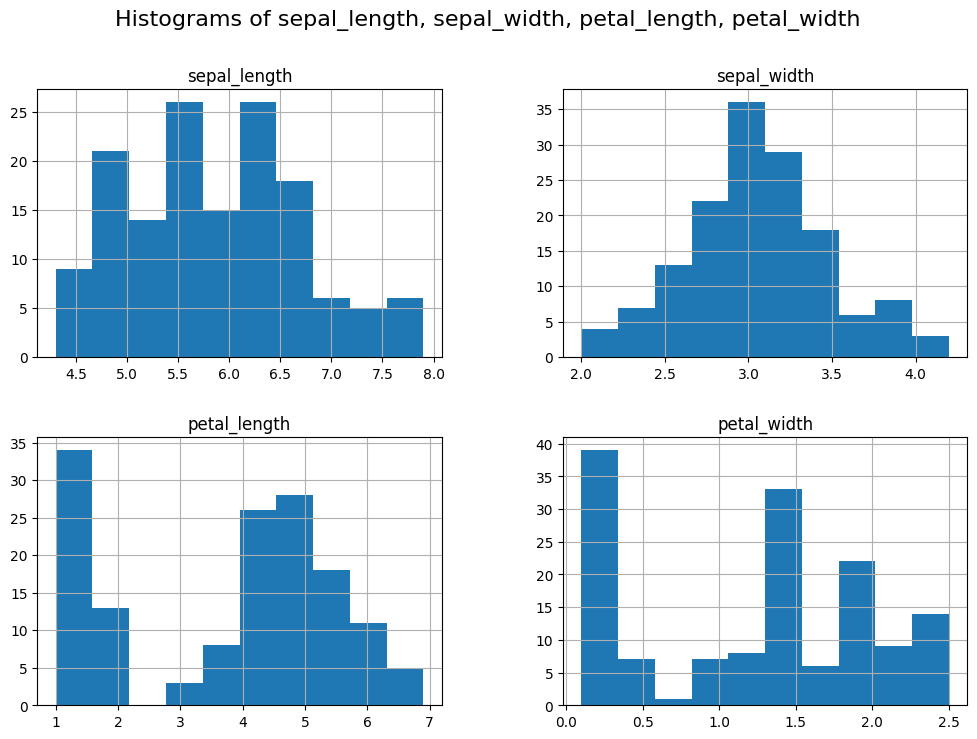

In [ ]:
#Univariate analysis
import matplotlib.pyplot as plt
import seaborn as sns


df1.hist(bins=10, figsize=(12, 8))
plt.suptitle('Histograms of sepal_length, sepal_width, petal_length, petal_width', fontsize=16)
plt.show()

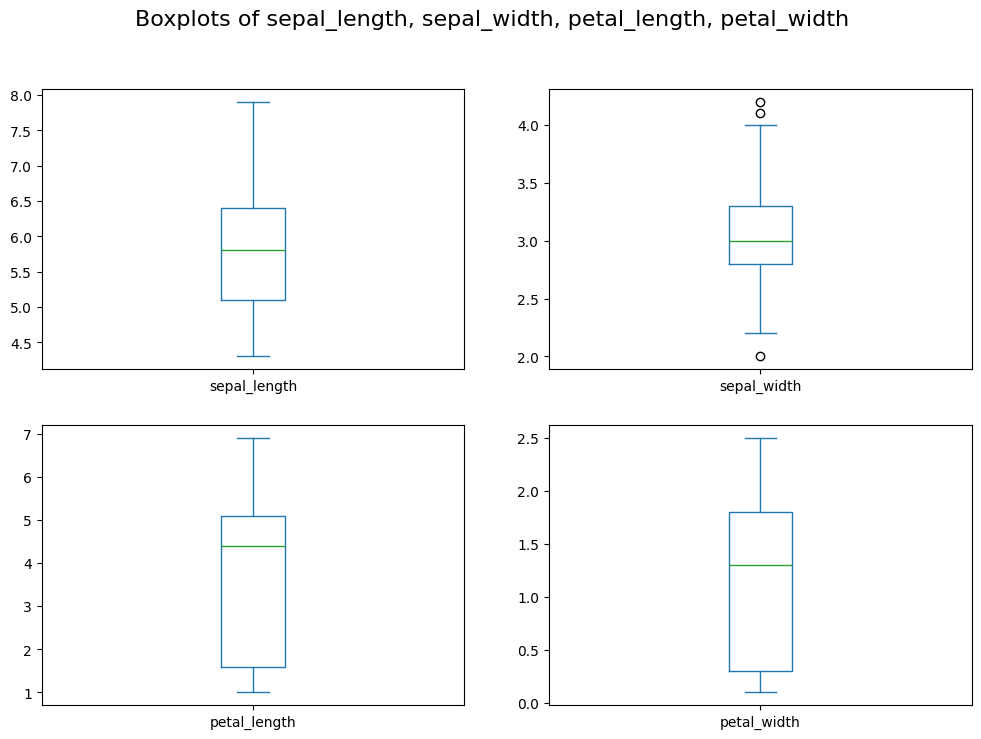

In [ ]:
#Checking outliers using boxplot
df1.plot(kind='box', subplots=True, layout=(2, 2), figsize=(12, 8))
plt.suptitle('Boxplots of sepal_length, sepal_width, petal_length, petal_width', fontsize=16)
plt.show()

##Univariate Analysis

In [ ]:
#Performing subplot
import plotly.express as px
fig = px.box(df1, x="species", y="sepal_length")
fig.show()

In [ ]:
#Performing subplot
import plotly.express as px
fig = px.box(df1, x="species", y="sepal_width")
fig.show()

In [ ]:
#Performing subplot
import plotly.express as px
fig = px.box(df1, x="species", y="petal_length")
fig.show()

In [ ]:
#Performing subplot
import plotly.express as px
fig = px.box(df1, x="species", y="petal_length")
fig.show()

In [ ]:
#Performing subplot
import plotly.express as px
fig = px.box(df1, x="species", y="petal_width")
fig.show()

In [ ]:
# Calculate the correlation between petal_length and petal_width
correlation = df1['petal_length'].corr(df1['petal_width'])
correlation

0.9616928853478944

In [ ]:
# Calculate the correlation between petal_length and sepal_length
correlation = df1['sepal_length'].corr(df1['petal_length'])
correlation

0.874807675731975

Preprocessing


In [ ]:
# Import LabelEncoder from sklearn.preprocessing
from sklearn.preprocessing import LabelEncoder # Added import statement
# Encode target variable
y = df1['species']
labelEncoder = LabelEncoder()
y_encoded = labelEncoder.fit_transform(y)

# Identify outliers based on IQR
Q1 = df['sepal_width'].quantile(0.25) # Removed unnecessary indentation
Q3 = df['sepal_width'].quantile(0.75) # Removed unnecessary indentation
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Filter outliers
df1 = df1[(df1['sepal_width'] >= lower_bound) & (df1['sepal_width'] <= upper_bound)]

df1.head(), y_encoded[:5]

(   sepal_length  sepal_width  petal_length  petal_width      species
 0           5.1          3.5           1.4          0.2  Iris-setosa
 1           4.9          3.0           1.4          0.2  Iris-setosa
 2           4.7          3.2           1.3          0.2  Iris-setosa
 3           4.6          3.1           1.5          0.2  Iris-setosa
 4           5.0          3.6           1.4          0.2  Iris-setosa,
 array([0, 0, 0, 0, 0]))

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd

# Separate features and target
X = df1.drop(columns=['species'])
y = df1['species']

# Initialize scalers
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)
X_standardized = pd.DataFrame(X_standardized, columns=X.columns)

# Normalize the data
normalize = MinMaxScaler()
X_normalized = scaler.fit_transform(X)
X_normalized = pd.DataFrame(X_normalized, columns=X.columns)
print("Standardized Data:\n", X_standardized.head())
print("\nNormalized Data:\n", X_normalized.head())


Standardized Data:
    sepal_length  sepal_width  petal_length  petal_width
0     -0.926103     1.163072     -1.393237    -1.370894
1     -1.166453    -0.096923     -1.393237    -1.370894
2     -1.406803     0.407075     -1.450554    -1.370894
3     -1.526978     0.155076     -1.335921    -1.370894
4     -1.046278     1.415071     -1.393237    -1.370894

Normalized Data:
    sepal_length  sepal_width  petal_length  petal_width
0     -0.926103     1.163072     -1.393237    -1.370894
1     -1.166453    -0.096923     -1.393237    -1.370894
2     -1.406803     0.407075     -1.450554    -1.370894
3     -1.526978     0.155076     -1.335921    -1.370894
4     -1.046278     1.415071     -1.393237    -1.370894


#Model design


In [ ]:
#Logistic regression
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=200)  # Increase max_iter if convergence warning occurs
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_rep)
print("\nConfusion Matrix:\n", conf_matrix)


Accuracy: 0.896551724137931

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       0.83      0.91      0.87        11
 Iris-virginica       0.89      0.80      0.84        10

       accuracy                           0.90        29
      macro avg       0.91      0.90      0.90        29
   weighted avg       0.90      0.90      0.90        29


Confusion Matrix:
 [[ 8  0  0]
 [ 0 10  1]
 [ 0  2  8]]


##Insights
It give R2 score for Logistic regression is 89%